In [1]:
from ego_solver import EGO
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib notebook
pal = sns.color_palette('Set1', n_colors=2, desat=.6)
sns.set_palette(pal)
sns.set_context(context='paper', font_scale=1.5)

sns.set_style('ticks')

(30L, 1L, 2L)
(2097L, 2L)


<IPython.core.display.Javascript object>


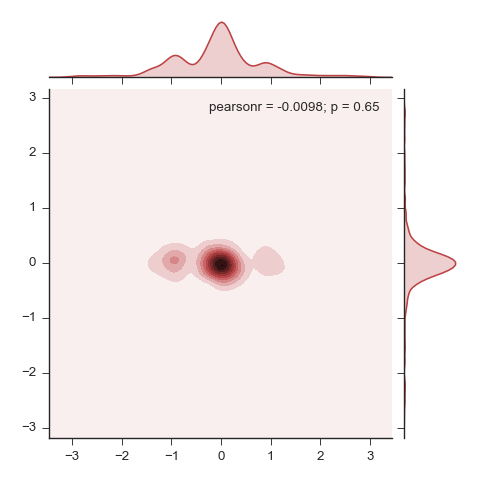

<IPython.core.display.Javascript object>


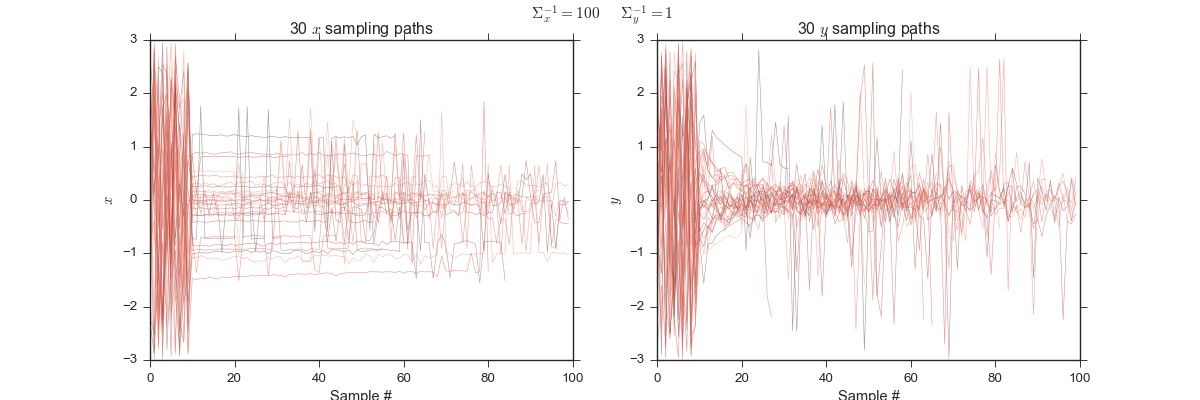

In [12]:
file_address = 'solution_obj_name_parabolic_maxiter_100_repeat_30x100.0.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

solution = np.array(dat['solution'])
print solution.shape
X =np.copy(solution[0,0,0])
for i in range(1,30):
    X = np.vstack((X,solution[i,0,0]))
print X.shape

sns.jointplot(X[:,0],X[:,1], kind='kde')
plt.suptitle(r'Sampling Distribution for $\Sigma^{-1}_x=100$', y=1.05, fontsize=13)

# plt.plot(solution[0,0,0])
def hairplot(solution,sig):
    
    with sns.color_palette('Reds_d', n_colors=30):
        fig,ax=plt.subplots(ncols=2, figsize=(15,5))
        for i in range(1,30):
            ax[0].plot(solution[i,0,0][:,0], lw=0.5, alpha=.5)
            ax[1].plot(solution[i,0,0][:,1], lw=0.5, alpha=.5)
        ax[0].set_title('30 $x$ sampling paths')
        ax[1].set_title('30 $y$ sampling paths')
        fig.suptitle('BO Sample paths for $f(x)=x^2+y^2$\n $\Sigma^{-1}_x='+str(sig)+'$'+\
                     '\t $\Sigma^{-1}_y=1$',
                     fontsize=14, y=1.05)
        ax[0].set_ylabel('$x$')
        ax[0].set_xlabel('Sample #')
        ax[1].set_ylabel('$y$')
        ax[1].set_xlabel('Sample #')
hairplot(solution,100)

(30L, 1L, 2L)


<IPython.core.display.Javascript object>


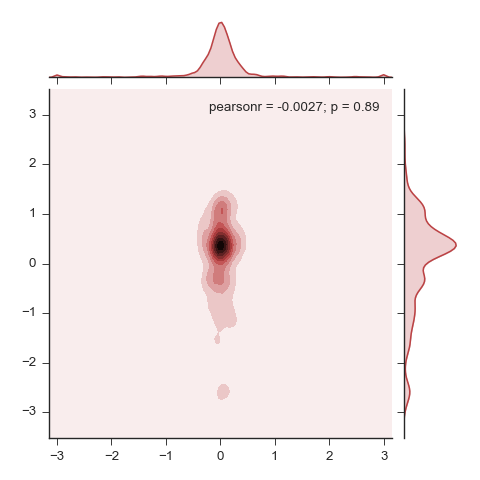

<IPython.core.display.Javascript object>


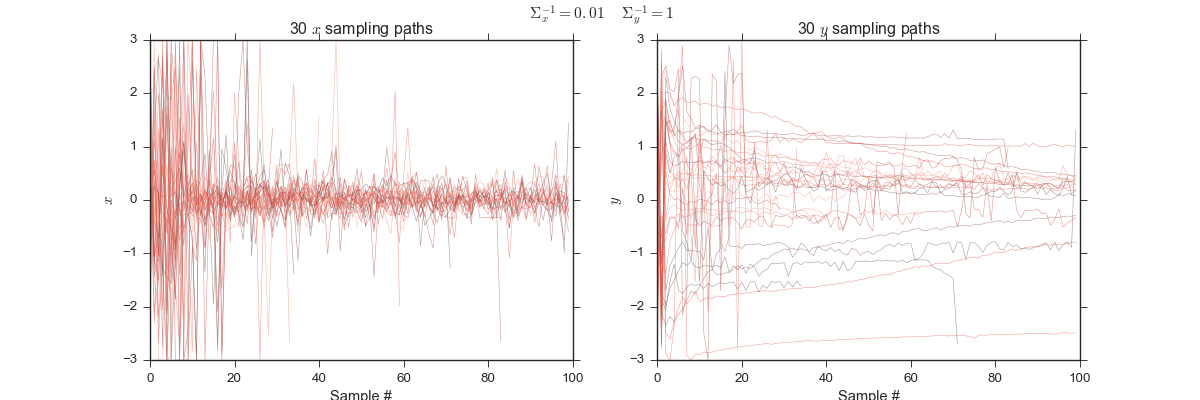

In [3]:
file_address = 'solution_obj_name_parabolic_maxiter_100_repeat_30x0.01.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)
    
solution = np.array(dat['solution'])
print solution.shape
X =np.copy(solution[0,0,0])
for i in range(1,30):
    X = np.vstack((X,solution[i,0,0]))
X.shape

sns.jointplot(X[:,0],X[:,1], kind='kde')
plt.suptitle(r'Sampling Distribution for $\Sigma^{-1}_x=0.01$', y=1.05, fontsize=13)

hairplot(solution, 0.01)

(30L, 1L, 2L)


<IPython.core.display.Javascript object>


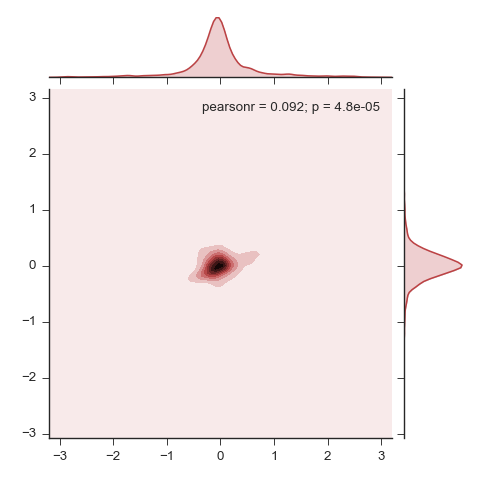

<IPython.core.display.Javascript object>


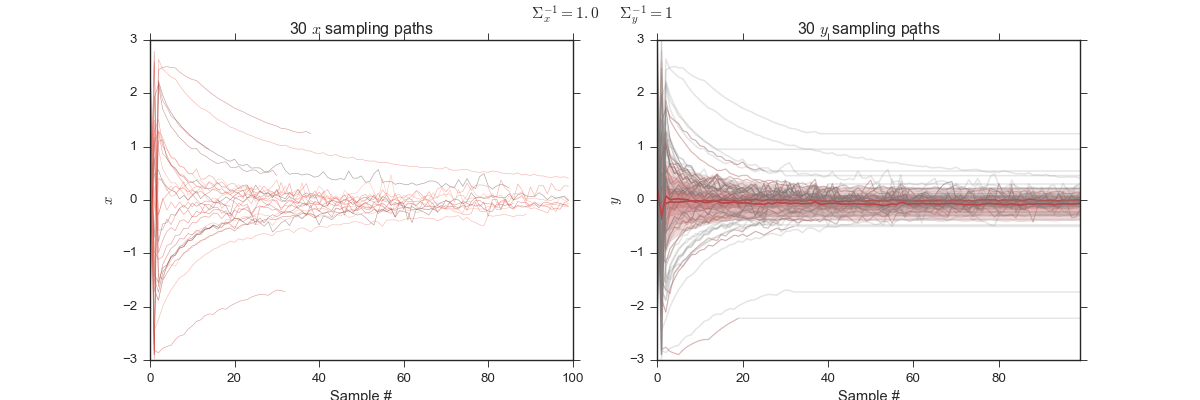

In [4]:
file_address = 'solution_obj_name_parabolic_maxiter_100_repeat_30x1.0.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)
    
solution = np.array(dat['solution'])
print solution.shape
X =np.copy(solution[0,0,0])
for i in range(1,30):
    X = np.vstack((X,solution[i,0,0]))
X.shape

sns.jointplot(X[:,0],X[:,1], kind='kde')
plt.suptitle(r'Sampling Distribution for $\Sigma^{-1}_x=1.0$', y=1.05, fontsize=13)
hairplot(solution, 1.0)

In [5]:
sns.tsplot(solution[0,0,0])

In [6]:
times = np.zeros((30,100))
for i in range(30):
    path = solution[i,0,0][:,0]
    times[i, :path.size] = path
    times[i, path.size:] = np.ones(100-path.size)*path[-1]
sns.tsplot(times, err_style='unit_traces', color='gray')
sns.tsplot(times, ci=[68,99.7])


In [7]:


times = np.zeros((30,100))
for i in range(30):
    path = solution[i,0,0][:,1]
    times[i, :path.size] = path
    times[i, path.size:] = np.ones(100-path.size)*path[-1]
sns.tsplot(times, err_style='unit_traces', color='gray')
sns.tsplot(times, ci=[68,99.7])


<IPython.core.display.Javascript object>


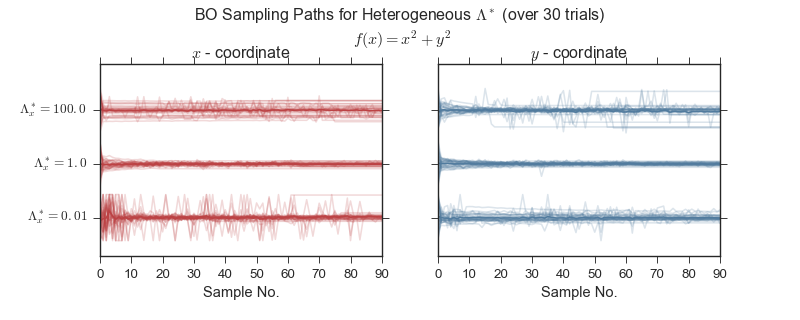

In [7]:
lambs=['0.01', '1.0', '100.0']

fig,ax = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

for n,i in enumerate(lambs):
    file_address = 'solution_obj_name_parabolic_maxiter_100_repeat_30x'+i+'.pkl'
    with open(file_address, 'r') as f:
        dat = pickle.load(f)

    solution = np.array(dat['solution'])

    timesx = np.zeros((30,100))
    timesy = np.zeros((30,100))
    for i in range(30):
        pathx = solution[i,0,0][:,0]
        pathy = solution[i,0,0][:,1]

        timesx[i, :pathx.size] = pathx
        timesx[i, pathx.size:] = np.ones(100-pathx.size)*pathx[-1]

        timesy[i, :pathy.size] = pathy
        timesy[i, pathy.size:] = np.ones(100-pathy.size)*pathy[-1]

    sns.tsplot(timesx[:,9:]+7*n, err_style=['unit_traces'], color=pal[0], ax=ax[0])
    sns.tsplot(timesy[:,9:]+7*n, err_style=['unit_traces'], color=pal[1], ax=ax[1])
# sns.tsplot(times, ci=[68,99.7])
ax[0].set_yticks([0,7,14])
ax[0].set_yticklabels(['$\Lambda^*_x='+i+'$' for i in lambs])
# plt.yticks([0,7,14], ['$\Lambda^*_{1,1}='+i+'$' for i in lambs])
ax[0].set_xlabel('Sample No.')
ax[1].set_xlabel('Sample No.')
ax[0].set_title('$x$ - coordinate')
ax[1].set_title('$y$ - coordinate')
fig.suptitle('BO Sampling Paths for Heterogeneous $\Lambda^*$ (over 30 trials) \n $f(x)=x^2+y^2$')
plt.subplots_adjust(top=0.8, bottom=0.2)

In [5]:
timesx.shape

(30L, 100L)